In [1]:
import tensorflow as tf

In [2]:
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.10.0


In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd

In [4]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_image.shape, train_label.shape

((60000, 28, 28), (60000,))

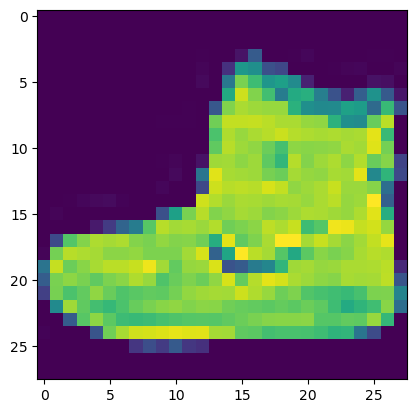

In [6]:
plt.imshow(train_image[0])

In [7]:
train_image = train_image/255
test_image = test_image/255

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["acc"]
)

In [11]:
model.fit(train_image, train_label, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5030 - acc: 0.8237
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3797 - acc: 0.8633
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3401 - acc: 0.8755


In [12]:
model.evaluate(test_image, test_label, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3605 - acc: 0.8683


[0.3604804575443268, 0.8683000206947327]

## 保存整个模型
整个模型可以保存到一个文件中，其中包含权重值，模型撇脂乃至优化器配置。这样，您就可以为模型设置检查点，并稍后从完全相同的状态继续训练，而无需访问原始代码。

在Keras中保存完全可正常使用的的模型非常有用，您可以在TensorFlow.js中加载它们，然后在网络浏览器中训练它们。

Keras使用HDF5标准提供基本的保存格式。

In [13]:
model.save("less_model.h5")

In [14]:
new_model = tf.keras.models.load_model("less_model.h5")

In [15]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
new_model.evaluate(test_image, test_label,verbose=0)

[0.3604804575443268, 0.8683000206947327]

#### 此方法保存一下所有内容
1. 权重值
2. 模型配置（架构）
3. 优化器配置

## 仅保存架构
有时我们只对模型的架构感兴趣，而无需保存权重值或优化器。在这种情况下，可以仅保存模型的”配置“

In [17]:
json_config = model.to_json()

In [18]:
json_config

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_input"}}, {"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_

In [19]:
reinitialized_model = tf.keras.models.model_from_json(json_config)

In [20]:
reinitialized_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
reinitialized_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["acc"]
)

In [22]:
reinitialized_model.evaluate(test_image,test_label,verbose=0)

[2.3895230293273926, 0.14579999446868896]

### 仅保存权重
有时候我们只需要保存模型的状态（其权重值），而对模型架构不感兴趣。在这种情况下，可以通过get_weight()获取权重值，并通过set_weight()设置权重值

In [23]:
weights = model.get_weights()

In [24]:
reinitialized_model.set_weights(weights)

In [25]:
reinitialized_model.evaluate(test_image,test_label,verbose=0)

[0.3604804575443268, 0.8683000206947327]

In [26]:
# 将权重保存到磁盘上
model.save_weights("less_weights.h5")

In [27]:
reinitialized_model.load_weights("less_weights.h5")

In [28]:
reinitialized_model.evaluate(test_image,test_label,verbose=0)

[0.3604804575443268, 0.8683000206947327]

### 在训练期间保存检查点

在训练期间或训练结束时自动保存检查点。这样一来，您便可以使用经过驯良的模型，而无需重新驯良该模型，或从上次暂停的地方继续训练，以防训练过程中断。

回调函数：tf.keras.callbacks.ModelCheckpoint

In [ ]:
tf.keras.callbacks.ModelCheckpoint()